# Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from set_extraction_monks import x_train_m1, y_train_m1, x_test_m1, y_test_m1, x_train_m2, y_train_m2, x_test_m2, y_test_m2, x_train_m3, y_train_m3, x_test_m3, y_test_m3

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, data_5 to data_432
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   124 non-null    int64
 1   a1      124 non-null    int64
 2   a2      124 non-null    int64
 3   a3      124 non-null    int64
 4   a4      124 non-null    int64
 5   a5      124 non-null    int64
 6   a6      124 non-null    int64
dtypes: int64(7)
memory usage: 7.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 432 entries, data_1 to data_432
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   432 non-null    int64
 1   a1      432 non-null    int64
 2   a2      432 non-null    int64
 3   a3      432 non-null    int64
 4   a4      432 non-null    int64
 5   a5      432 non-null    int64
 6   a6      432 non-null    int64
dtypes: int64(7)
memory usage: 27.0+ KB
Shapes before encoding:
x_train_m1 (124, 6)
y_train_m1 (124,)
x_test_m1 (

# Models

In [4]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix

In [5]:
results = []

# Neighbors

## KNeighborsClassifier monk-1

### Grid search for parameter setting 


Text(0, 0.5, 'Accuracy Score')

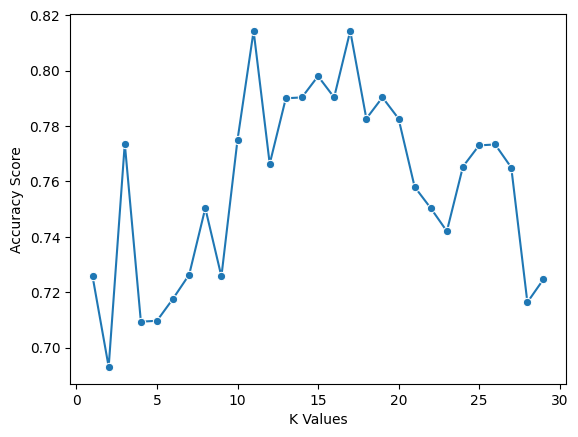

In [6]:
k_values = [i for i in range (1,30)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x_train_m1, y_train_m1, cv=5)
    scores.append(np.mean(score))
    
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [7]:
params = { 
     'n_neighbors':[5,7,10,11,12,13,14,15,16,17,18,19,20],
     'weights':['uniform', 'distance'], 
     'algorithm':['auto','ball_tree', 'kd_tree', 'brute'], 
     'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev', 'l1', 'l2'], 
     'leaf_size':[10, 20, 25, 30, 35, 40, 60],
     'p':[1, 2, 5, 7, 9]
}

In [8]:
#hyperparameter tuning with grid search CV
n_jobs_search = -1
knc_search = KNeighborsClassifier()

knc_cv_m1 = GridSearchCV(estimator=knc_search, param_grid=params, scoring='accuracy', cv=5, verbose=4, n_jobs=n_jobs_search) 
knc_cv_m1.fit(x_train_m1, y_train_m1)

Fitting 5 folds for each of 21840 candidates, totalling 109200 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 25, 30, 35, 40, 60],
                         'metric': ['minkowski', 'euclidean', 'manhattan',
                                    'chebyshev', 'l1', 'l2'],
                         'n_neighbors': [5, 7, 10, 11, 12, 13, 14, 15, 16, 17,
                                         18, 19, 20],
                         'p': [1, 2, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=4)

In [9]:
knc_cv_m1.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 25,
 'metric': 'minkowski',
 'n_neighbors': 10,
 'p': 5,
 'weights': 'distance'}

In [10]:
# validation
knc_cv_m1.best_score_

0.8463333333333333

In [11]:
# save the model to disk
joblib.dump(knc_cv_m1.best_estimator_, 'monk_models/knc_m1.z')

['monk_models/knc_m1.z']

### Validation plot

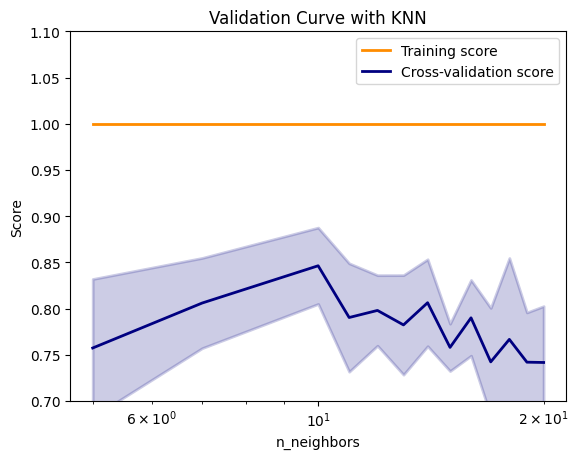

In [12]:
from sklearn.model_selection import validation_curve

param_range = [5,7,10,11,12,13,14,15,16,17,18,19,20]

train_scores, test_scores = validation_curve(
    KNeighborsClassifier(algorithm='ball_tree',
                        leaf_size=25,
                        metric='minkowski',
                        p=5,
                        weights='distance'),
    x_train_m1,
    y_train_m1,
    param_name="n_neighbors",
    param_range=param_range,
    scoring='accuracy',
    n_jobs=2
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with KNN")
plt.xlabel("n_neighbors")
plt.ylabel("Score")

plt.ylim(0.7, 1.1)

lw = 2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)

plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)

plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)

plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw
)

plt.legend(loc="best")

plt.show()

### Final model

In [13]:
knc = joblib.load('monk_models/knc_m1.z')

In [14]:
knc

KNeighborsClassifier(algorithm='ball_tree', leaf_size=25, n_neighbors=10, p=5,
                     weights='distance')

In [15]:
train_pred_knc = knc.predict(x_train_m1)

In [16]:
print('Accuracy train set')
print(classification_report(y_train_m1, train_pred_knc))

Accuracy train set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        62

    accuracy                           1.00       124
   macro avg       1.00      1.00      1.00       124
weighted avg       1.00      1.00      1.00       124



In [17]:
test_pred_knc = knc.predict(x_test_m1)

In [18]:
print('Accuarcy test set')
print(classification_report(y_test_m1, test_pred_knc))

Accuarcy test set
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       216
           1       0.85      0.84      0.84       216

    accuracy                           0.84       432
   macro avg       0.84      0.84      0.84       432
weighted avg       0.84      0.84      0.84       432



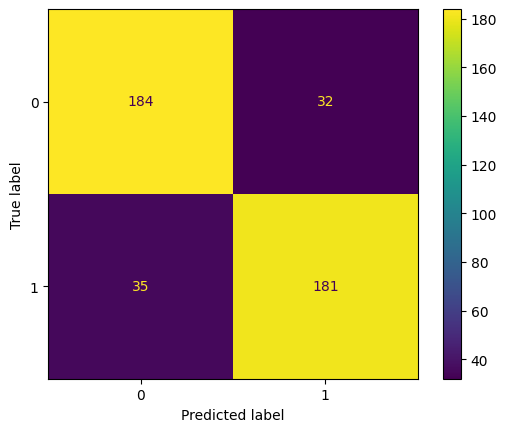

In [19]:
plot_confusion_matrix(knc, x_test_m1, y_test_m1)
plt.show() 

In [20]:
results.append(('KNeighborsClassifier monk-1 train', accuracy_score(y_train_m1, train_pred_knc)))
results.append(('KNeighborsClassifier monk-1 validation', knc_cv_m1.best_score_))
results.append(('KNeighborsClassifier monk-1 test', accuracy_score(y_test_m1, test_pred_knc)))

## KNeighborsClassifier monk-2

### Grid search for parameter setting 


Text(0, 0.5, 'Accuracy Score')

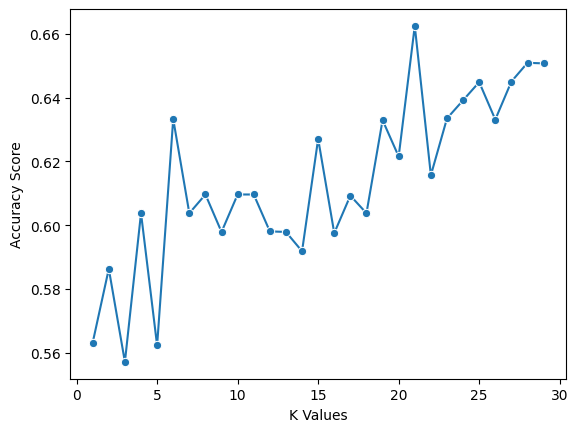

In [21]:
k_values = [i for i in range (1,30)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x_train_m2, y_train_m2, cv=5)
    scores.append(np.mean(score))
    
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [22]:
params = { 
     'n_neighbors':[5,6,7,8,15,16,20,21,22,23,25],
     'weights':['uniform', 'distance'], 
     'algorithm':['auto','ball_tree', 'kd_tree', 'brute'], 
     'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev', 'l1', 'l2'], 
     'leaf_size':[10, 20, 25, 30, 35, 40, 60],
     'p':[1, 2, 5, 7, 9]
}

In [23]:
#hyperparameter tuning with grid search CV
n_jobs_search = -1
knc_search = KNeighborsClassifier()

knc_cv_m2 = GridSearchCV(estimator=knc_search, param_grid=params, scoring='accuracy', cv=5, verbose=4, n_jobs=n_jobs_search) 
knc_cv_m2.fit(x_train_m2, y_train_m2)

Fitting 5 folds for each of 18480 candidates, totalling 92400 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 25, 30, 35, 40, 60],
                         'metric': ['minkowski', 'euclidean', 'manhattan',
                                    'chebyshev', 'l1', 'l2'],
                         'n_neighbors': [5, 6, 7, 8, 15, 16, 20, 21, 22, 23,
                                         25],
                         'p': [1, 2, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=4)

In [24]:
knc_cv_m2.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'metric': 'minkowski',
 'n_neighbors': 21,
 'p': 1,
 'weights': 'uniform'}

In [25]:
# validation
knc_cv_m2.best_score_

0.662566844919786

In [26]:
# save the model to disk
joblib.dump(knc_cv_m2.best_estimator_, 'monk_models/knc_m2.z')

['monk_models/knc_m2.z']

### Validation plot

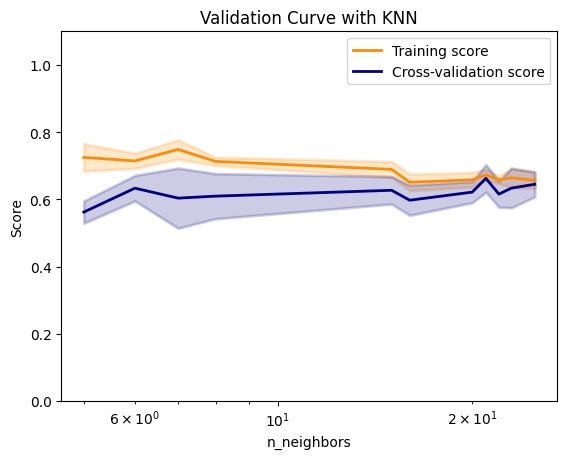

In [27]:
from sklearn.model_selection import validation_curve

param_range = [5,6,7,8,15,16,20,21,22,23,25]

train_scores, test_scores = validation_curve(
    KNeighborsClassifier(algorithm='auto',
                        leaf_size=10,
                        metric='minkowski',
                        p=1,
                        weights='uniform'),
    x_train_m2,
    y_train_m2,
    param_name="n_neighbors",
    param_range=param_range,
    scoring='accuracy',
    n_jobs=2
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with KNN")
plt.xlabel("n_neighbors")
plt.ylabel("Score")

plt.ylim(0.0, 1.1)

lw = 2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)

plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)

plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)

plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw
)

plt.legend(loc="best")

plt.show()

### Final model

In [28]:
knc = joblib.load('monk_models/knc_m2.z')

In [29]:
knc

KNeighborsClassifier(leaf_size=10, n_neighbors=21, p=1)

In [30]:
train_pred_knc = knc.predict(x_train_m2)

In [31]:
print('Accuracy train set')
print(classification_report(y_train_m2, train_pred_knc))

Accuracy train set
              precision    recall  f1-score   support

           0       0.67      0.92      0.78       105
           1       0.67      0.25      0.36        64

    accuracy                           0.67       169
   macro avg       0.67      0.59      0.57       169
weighted avg       0.67      0.67      0.62       169



In [32]:
test_pred_knc = knc.predict(x_test_m2)

In [33]:
print('Accuarcy test set')
print(classification_report(y_test_m2, test_pred_knc))

Accuarcy test set
              precision    recall  f1-score   support

           0       0.69      0.90      0.78       290
           1       0.46      0.17      0.25       142

    accuracy                           0.66       432
   macro avg       0.58      0.54      0.51       432
weighted avg       0.61      0.66      0.61       432



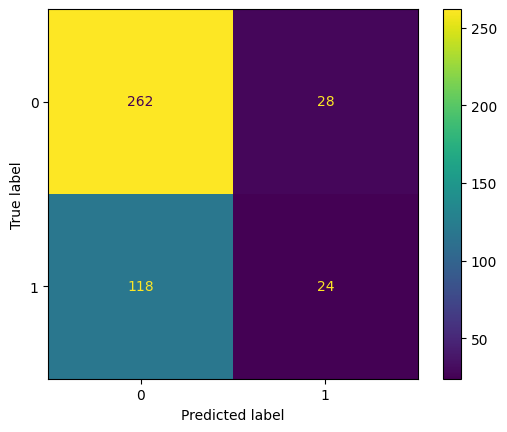

In [34]:
plot_confusion_matrix(knc, x_test_m2, y_test_m2)
plt.show() 

In [35]:
results.append(('KNeighborsClassifier monk-2 train', accuracy_score(y_train_m2, train_pred_knc)))
results.append(('KNeighborsClassifier monk-2 validation', knc_cv_m2.best_score_))
results.append(('KNeighborsClassifier monk-2 test', accuracy_score(y_test_m2, test_pred_knc)))

## KNeighborsClassifier monk-3

### Grid search for parameter setting 


Text(0, 0.5, 'Accuracy Score')

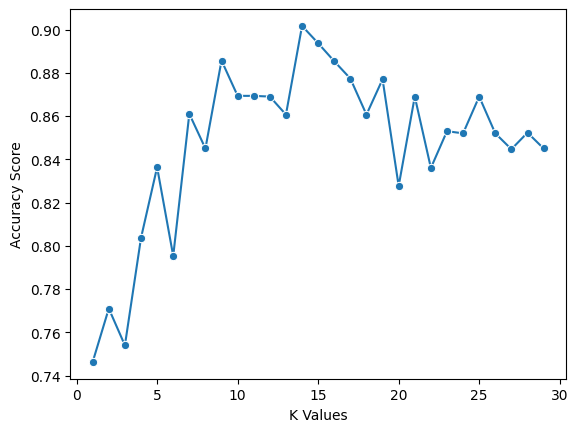

In [36]:
k_values = [i for i in range (1,30)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x_train_m3, y_train_m3, cv=5)
    scores.append(np.mean(score))
    
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [37]:
params = { 
     'n_neighbors':[5, 10, 11, 12, 13, 14, 15, 16, 18, 20],
     'weights':['uniform', 'distance'], 
     'algorithm':['auto','ball_tree', 'kd_tree', 'brute'], 
     'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev', 'l1', 'l2'], 
     'leaf_size':[1, 2, 5, 10, 20, 30, 40, 50],
     'p':[1, 1.5, 2, 2.5, 3, 3.5]
}

In [38]:
#hyperparameter tuning with grid search CV
n_jobs_search = -1
knc_search = KNeighborsClassifier()

knc_cv_m3 = GridSearchCV(estimator=knc_search, param_grid=params, scoring='accuracy', cv=5, verbose=4, n_jobs=n_jobs_search) 
knc_cv_m3.fit(x_train_m3, y_train_m3)

Fitting 5 folds for each of 23040 candidates, totalling 115200 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 2, 5, 10, 20, 30, 40, 50],
                         'metric': ['minkowski', 'euclidean', 'manhattan',
                                    'chebyshev', 'l1', 'l2'],
                         'n_neighbors': [5, 10, 11, 12, 13, 14, 15, 16, 18, 20],
                         'p': [1, 1.5, 2, 2.5, 3, 3.5],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=4)

In [39]:
knc_cv_m3.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 2,
 'metric': 'minkowski',
 'n_neighbors': 18,
 'p': 1,
 'weights': 'distance'}

In [40]:
# validation
knc_cv_m3.best_score_

0.9019999999999999

In [41]:
# save the model to disk
joblib.dump(knc_cv_m3.best_estimator_, 'monk_models/knc_m3.z')

['monk_models/knc_m3.z']

### Validation plot

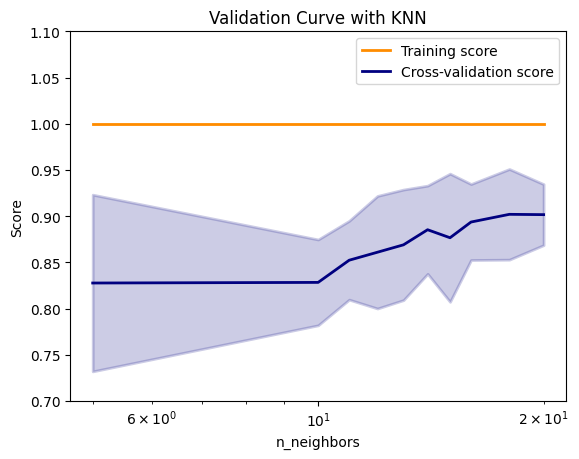

In [42]:
from sklearn.model_selection import validation_curve

param_range = [5, 10, 11, 12, 13, 14, 15, 16, 18, 20]

train_scores, test_scores = validation_curve(
    KNeighborsClassifier(algorithm='ball_tree',
                         leaf_size=2,
                         metric='minkowski',
                         p=1,
                         weights='distance'),
    x_train_m3,
    y_train_m3,
    param_name="n_neighbors",
    param_range=param_range,
    scoring='accuracy',
    n_jobs=2
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with KNN")
plt.xlabel("n_neighbors")
plt.ylabel("Score")

plt.ylim(0.7, 1.1)

lw = 2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)

plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)

plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)

plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw
)

plt.legend(loc="best")

plt.show()

### Final model

In [43]:
knc = joblib.load('monk_models/knc_m3.z')

In [44]:
knc

KNeighborsClassifier(algorithm='ball_tree', leaf_size=2, n_neighbors=18, p=1,
                     weights='distance')

In [45]:
train_pred_knc = knc.predict(x_train_m3)

In [46]:
print('Accuracy train set')
print(classification_report(y_train_m3, train_pred_knc))

Accuracy train set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        60

    accuracy                           1.00       122
   macro avg       1.00      1.00      1.00       122
weighted avg       1.00      1.00      1.00       122



In [47]:
test_pred_knc = knc.predict(x_test_m3)

In [48]:
print('Accuarcy test set')
print(classification_report(y_test_m3, test_pred_knc))

Accuarcy test set
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       204
           1       0.97      0.89      0.93       228

    accuracy                           0.93       432
   macro avg       0.93      0.93      0.93       432
weighted avg       0.93      0.93      0.93       432



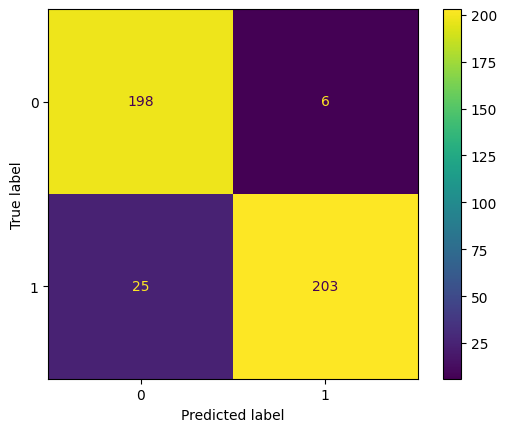

In [49]:
plot_confusion_matrix(knc, x_test_m3, y_test_m3)
plt.show() 

In [50]:
results.append(('KNeighborsClassifier monk-3 train', accuracy_score(y_train_m3, train_pred_knc)))
results.append(('KNeighborsClassifier monk-3 validation', knc_cv_m3.best_score_))
results.append(('KNeighborsClassifier monk-3 test', accuracy_score(y_test_m3, test_pred_knc)))

# Summary

In [51]:
for i in range(len(results)):
  print(results[i])

('KNeighborsClassifier monk-1 train', 1.0)
('KNeighborsClassifier monk-1 validation', 0.8463333333333333)
('KNeighborsClassifier monk-1 test', 0.8449074074074074)
('KNeighborsClassifier monk-2 train', 0.6686390532544378)
('KNeighborsClassifier monk-2 validation', 0.662566844919786)
('KNeighborsClassifier monk-2 test', 0.6620370370370371)
('KNeighborsClassifier monk-3 train', 1.0)
('KNeighborsClassifier monk-3 validation', 0.9019999999999999)
('KNeighborsClassifier monk-3 test', 0.9282407407407407)
